# Case Study 5 : Data Science in Email Data

**Required Readings:** 
* Please download the Enron Email dataset from [here](https://www.kaggle.com/wcukierski/enron-email-dataset) or [here](https://www.cs.cmu.edu/~./enron/).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


**NOTE**
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.


# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Enron Corp. was famous for fraudulently manufacturing audit reports which eventually led to their bankruptcy. Before bankruptcy, about 20000 people were employed at Enron and it was a major producer of electricity, natural gas etc. Investigations into the company at the time revealed that the senior management had played a pivotal role in covering up the true audit numbers. 


We attempt to analyze if there was something that could be done from any "righteous" individual of senior management at Enron. We do so by exploring the email dataset of Enron that involves conversations between most senior management officials leading up to the company's bankruptcy. 


# Data Collection/Processing: 

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary






In [1]:
#initialize library (well, not initialize per se)
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
stopwords = stopwords.words('english')

In [2]:
#import our dataset
df = pd.read_csv('emails.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [3]:
#read message
x = df.loc[530]['message']
print(x)

Message-ID: <14373436.1075855728947.JavaMail.evans@thyme>
Date: Thu, 4 Jan 2001 04:01:00 -0800 (PST)
From: phillip.allen@enron.com
To: llewter@austin.rr.com
Subject: Re: SM134 Balcones Bank Loan
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Larry Lewter" <llewter@austin.rr.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_June2001\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

I can't open a winmail.dat file.  can you send in a different format


Yuck, our data really need preprocessing for sure.

In [4]:
#import another library to solve our problem, convenient life I would say
from email import message_from_string

In [5]:
#from string to list of tubles
list_x = message_from_string(x)
list_x.items()

[('Message-ID', '<14373436.1075855728947.JavaMail.evans@thyme>'),
 ('Date', 'Thu, 4 Jan 2001 04:01:00 -0800 (PST)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'llewter@austin.rr.com'),
 ('Subject', 'Re: SM134 Balcones Bank Loan'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', '"Larry Lewter" <llewter@austin.rr.com> @ ENRON'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_June2001\\Notes Folders\\'sent mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen.nsf')]

In [6]:
#now our one particular data looks nice, it is time for loop!
#let's define the function to do that job for us
'''
Function addColFromEmail (column_name)
    This function will add the column 'column_name' to our dataset from the message field.
    Input:
            column_name: a string that indicates the column name and the field name that we want to add (i.e. Message-ID, Date, etc.)
    Output:
            None. 
'''
def addColFromEmail(column_name):
    tmp = []
    for data in df['message']:
        list_data = message_from_string(data)
        tmp.append(list_data.get(column_name))
    df[column_name] = tmp

In [7]:
'''
Function addMessage ()
    This function will remove column 'message' and then add the column 'message' with message called by get_payload() to our dataset from the message field.
    Input:
            None.
    Output:
            None. 
'''
def addMessage():
    tmp = []
    for data in df['message']:
        list_data = message_from_string(data)
        msg_val = list_data.get_payload()
        msg_val = re.sub(r"^.:\s.|^-.\n?.-$|\n|^>", '', msg_val, 0, re.MULTILINE)
        part = msg_val.partition('-e')
        msg_val = part[0]
        tmp.append(msg_val)
    df.drop(['message'], axis = 1)
    df['message'] = tmp
    

In [9]:
#took a while to do
addColFromEmail('From')

In [10]:
#Woo hoo!
df.head(3)

file                                            message  \
0    allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1   allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...   

                      From  
0  phillip.allen@enron.com  
1  phillip.allen@enron.com  
2  phillip.allen@enron.com

In [11]:
#MORE!!!!!! (I mean, more time not more columns)
addColFromEmail('To')
addColFromEmail('Subject')
addColFromEmail('Date')

In [12]:
addMessage()

In [13]:
#adding folder
def folder(file):
    column = []
    for string in file:
        string =  re.sub(r"_", '', string, 0, re.MULTILINE)
        column.append(string.split("/")[1])
    return column

df["folder"] = folder(df["file"])

In [14]:
df = df.drop('file', 1)

In [15]:
#Woo hoo!
df.head(5)

message                     From  \
0                              Here is our forecast   phillip.allen@enron.com   
1  Traveling to have a business meeting takes the...  phillip.allen@enron.com   
2                     test successful.  way to go!!!  phillip.allen@enron.com   
3  Randy, Can you send me a schedule of the salar...  phillip.allen@enron.com   
4                Let's shoot for Tuesday at 11:45.    phillip.allen@enron.com   

                        To    Subject                                   Date  \
0     tim.belden@enron.com             Mon, 14 May 2001 16:39:00 -0700 (PDT)   
1  john.lavorato@enron.com        Re:   Fri, 4 May 2001 13:51:00 -0700 (PDT)   
2   leah.arsdall@enron.com   Re: test  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)   
3    randall.gay@enron.com             Mon, 23 Oct 2000 06:13:00 -0700 (PDT)   
4     greg.piper@enron.com  Re: Hello  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)   

     folder  
0  sentmail  
1  sentmail  
2  sentmail  
3  sentmail  
4  sentmail

In [16]:
#we are using only the sent mail
df[df['folder'] == "sentmail"]

message  \
0                                   Here is our forecast    
1       Traveling to have a business meeting takes the...   
2                          test successful.  way to go!!!   
3       Randy, Can you send me a schedule of the salar...   
4                     Let's shoot for Tuesday at 11:45.     
...                                                   ...   
500550  Brad,Greg asked that I drop you a line to apol...   
500551  Received test message.   \tEnron North America...   
500552          i will try to call and talk you thru this   
500553  Allan,Please remove Greg Whalley from this dis...   
500554  John,Please remove Greg Whalley from this dist...   

                           From                       To  \
0       phillip.allen@enron.com     tim.belden@enron.com   
1       phillip.allen@enron.com  john.lavorato@enron.com   
2       phillip.allen@enron.com   leah.arsdall@enron.com   
3       phillip.allen@enron.com    randall.gay@enron.com   
4       phillip.allen@enron.com     greg.piper@enron.com   
...                         ...                      ...   
500550     liz.taylor@enron.com  bradleyromine@yahoo.com   
500551     liz.taylor@enron.com     greg.piper@enron.com   
500552   greg.whalley@enron.com  john.sherriff@enron.com   
500553     liz.taylor@enron.com     allan.ford@enron.com   
500554     liz.taylor@enron.com   john.chismar@enron.com   

                               Subject                                   Date  \
0                                       Mon, 14 May 2001 16:39:00 -0700 (PDT)   
1                                  Re:   Fri, 4 May 2001 13:51:00 -0700 (PDT)   
2                             Re: test  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)   
3                                       Mon, 23 Oct 2000 06:13:00 -0700 (PDT)   
4                            Re: Hello  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)   
...                                ...                                    ...   
500550                  Re: Interviews   Thu, 1 Jun 2000 10:29:00 -0700 (PDT)   
500551                        Re: Test  Wed, 17 May 2000 07:10:00 -0700 (PDT)   
500552                     merlin comp  Sun, 14 May 2000 06:11:00 -0700 (PDT)   
500553    Re: DPR Australia 9 May 2000   Tue, 9 May 2000 01:44:00 -0700 (PDT)   
500554  Re: Singapore Overnight 5/9/00   Tue, 9 May 2000 01:43:00 -0700 (PDT)   

          folder  
0       sentmail  
1       sentmail  
2       sentmail  
3       sentmail  
4       sentmail  
...          ...  
500550  sentmail  
500551  sentmail  
500552  sentmail  
500553  sentmail  
500554  sentmail  

[30109 rows x 6 columns]

In [17]:
df.iloc[9999]['message']

"Yea, thanks for reminding me about your b-day, I nearly forgot (ha ha ha)! I don't know if I should come to the big birthday bash b/c it is in a shady area.What do you think?"

In [18]:
#adding all the messages to a single large list
msg = []
for i in df['message']:
    msg.append(i)

In [19]:
#lets split the sentences
sentences = []
for i in msg:
    sentences.append(sent_tokenize(i))

In [20]:
sentences[0:5]

[['Here is our forecast'],
 ['Traveling to have a business meeting takes the fun out of the trip.',
  'Especially if you have to prepare a presentation.',
  'I would suggest holding the business plan meetings here then take a trip without any formal business meetings.',
  'I would even try and get some honest opinions on whether a trip is even desired or necessary.As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.',
  'Too often the presenter speaks and the others are quiet just waiting for their turn.',
  'The meetings might be better if held in a round table discussion format.',
  'My suggestion for where to go is Austin.',
  "Play golf and rent a ski boat and jet ski's.",
  'Flying somewhere takes too much time.'],
 ['test successful.', 'way to go!!', '!'],
 ['Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group.',
  'Plus you

In [21]:
#needs more cleaning
final_msg = []
for i in sentences:
    i = [re.sub(r"[^a-zA-Z]", " ", p, 0, re.MULTILINE) for p in i]
    i = [re.sub(r"\s+,\'\[\]'\"", " ", p, 0, re.MULTILINE) for p in i]
    final_msg.append([p.lower() for p in i])

In [23]:
final_msg[0:5]

[['here is our forecast'],
 ['traveling to have a business meeting takes the fun out of the trip ',
  'especially if you have to prepare a presentation ',
  'i would suggest holding the business plan meetings here then take a trip without any formal business meetings ',
  'i would even try and get some honest opinions on whether a trip is even desired or necessary as far as the business meetings  i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not ',
  'too often the presenter speaks and the others are quiet just waiting for their turn ',
  'the meetings might be better if held in a round table discussion format ',
  'my suggestion for where to go is austin ',
  'play golf and rent a ski boat and jet ski s ',
  'flying somewhere takes too much time '],
 ['test successful ', 'way to go  ', ' '],
 ['randy  can you send me a schedule of the salary and level of everyone in the scheduling group ',
  'plus you

In [24]:
#we need to remove stop words like these
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def remove_stop_words(msg):
    newmsg = " ".join([word for word in msg if word not in stopwords])
    return newmsg

In [26]:
for i in range(len(final_msg)):
    final_msg[i] = [remove_stop_words(s.split()) for s in final_msg[i]]


In [27]:
final_msg[0:5]

[['forecast'],
 ['traveling business meeting takes fun trip',
  'especially prepare presentation',
  'would suggest holding business plan meetings take trip without formal business meetings',
  'would even try get honest opinions whether trip even desired necessary far business meetings think would productive try stimulate discussions across different groups working',
  'often presenter speaks others quiet waiting turn',
  'meetings might better held round table discussion format',
  'suggestion go austin',
  'play golf rent ski boat jet ski',
  'flying somewhere takes much time'],
 ['test successful', 'way go', ''],
 ['randy send schedule salary level everyone scheduling group',
  'plus thoughts changes need made',
  'patti example phillip'],
 ['let shoot tuesday']]

In [28]:
final = str(final_msg)

In [29]:
word = word_tokenize(final)

In [30]:
frequency = nltk.FreqDist(word)

In [31]:
#printing most common 1000 words
print(frequency.most_common(1000))

[(',', 4409452), ("'", 4350055), ('enron', 1572335), ('ect', 1043369), ('com', 958509), ('hou', 567566), ('[', 517402), (']', 517402), ('e', 351995), ('subject', 318341), ('corp', 245721), ('pm', 233118), ('message', 229684), ('please', 229175), ('would', 224195), ('http', 207302), ('new', 200972), ('mail', 200574), ('power', 200330), ('energy', 196845), ('sent', 190867), ('may', 178395), ('www', 173528), ('gas', 166581), ('time', 166536), ('know', 164288), ('ees', 159257), ('us', 151662), ('pmto', 140545), ('information', 139214), ('one', 138692), ('get', 137043), ('market', 132806), ('na', 130174), ('company', 127554), ('development', 124473), ('c', 124287), ('call', 123536), ('said', 122333), ("'please", 118851), ('day', 117939), ('need', 117290), ('like', 115918), ('original', 115377), ('email', 111634), ('business', 108762), ('cc', 107629), ('j', 107316), ('``', 106735), ('amto', 106007), ('week', 105524), ('p', 104855), ('forwarded', 104075), ('california', 103188), ('thanks', 10

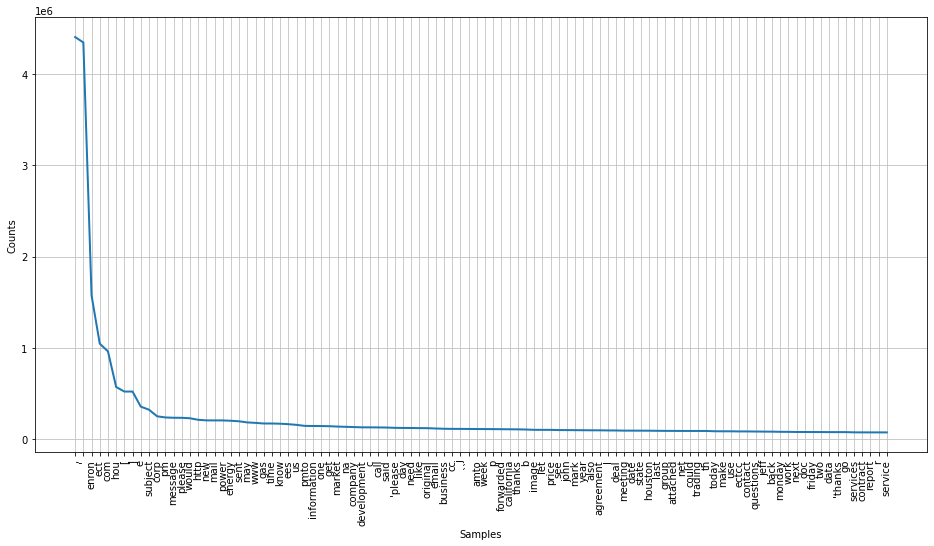

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
plt.figure(figsize =(16,8))
frequency.plot(100)

In [37]:
from nltk.stem.porter import PorterStemmer

In [38]:
p_stemmer = PorterStemmer()

In [40]:
stem_words = []
stemmed_words = [p_stemmer.stem(i) for i in word]
stem_words.append(stemmed_words)

In [44]:
#it cuts the words
stem_words[0:5]

[['[',
  '[',
  "'forecast",
  "'",
  ']',
  ',',
  '[',
  "'travel",
  'busi',
  'meet',
  'take',
  'fun',
  'trip',
  "'",
  ',',
  "'especi",
  'prepar',
  'present',
  "'",
  ',',
  "'would",
  'suggest',
  'hold',
  'busi',
  'plan',
  'meet',
  'take',
  'trip',
  'without',
  'formal',
  'busi',
  'meet',
  "'",
  ',',
  "'would",
  'even',
  'tri',
  'get',
  'honest',
  'opinion',
  'whether',
  'trip',
  'even',
  'desir',
  'necessari',
  'far',
  'busi',
  'meet',
  'think',
  'would',
  'product',
  'tri',
  'stimul',
  'discuss',
  'across',
  'differ',
  'group',
  'work',
  "'",
  ',',
  "'often",
  'present',
  'speak',
  'other',
  'quiet',
  'wait',
  'turn',
  "'",
  ',',
  "'meet",
  'might',
  'better',
  'held',
  'round',
  'tabl',
  'discuss',
  'format',
  "'",
  ',',
  "'suggest",
  'go',
  'austin',
  "'",
  ',',
  "'play",
  'golf',
  'rent',
  'ski',
  'boat',
  'jet',
  'ski',
  "'",
  ',',
  "'fli",
  'somewher',
  'take',
  'much',
  'time',
  "'",
  '

In [47]:
frequency_stem = nltk.FreqDist(stemmed_words)

In [59]:
print(frequency_stem.most_common(5000))

[(',', 4409452), ("'", 4350055), ('enron', 1572608), ('ect', 1043522), ('com', 958801), ('hou', 567768), ('[', 517402), (']', 517402), ('e', 352021), ('subject', 319420), ('messag', 256291), ('corp', 246259), ('pleas', 233773), ('pm', 233156), ('would', 224195), ('mail', 215924), ('market', 211999), ('http', 209931), ('time', 207176), ('power', 205781), ('new', 201050), ('energi', 197491), ('sent', 190910), ('may', 179214), ('www', 173528), ('compani', 171324), ('get', 171158), ('forward', 170676), ('ga', 169677), ('know', 169646), ('price', 169526), ('need', 167578), ('ee', 162608), ('day', 161187), ('call', 158843), ('develop', 156112), ('inform', 153667), ('us', 151662), ('trade', 150719), ('use', 144334), ('schedul', 143721), ('one', 143546), ('pmto', 140545), ('deal', 139903), ('servic', 139328), ('work', 139054), ('thank', 138648), ('origin', 135656), ('like', 135504), ('busi', 131647), ('meet', 131579), ('na', 130523), ('week', 130024), ('year', 129620), ('go', 129365), ('chang'

In [53]:
from nltk.stem.wordnet import WordNetLemmatizer

In [54]:
wordnet_lemmatizer = WordNetLemmatizer()

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nithincb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [58]:
lem_words = []
lemmatized_words = [wordnet_lemmatizer.lemmatize(i) for i in word]
lem_words.append(lemmatized_words)

In [60]:
frequency_lem = nltk.FreqDist(lemmatized_words)

In [61]:
print(frequency_lem.most_common(5000))

[(',', 4409452), ("'", 4350055), ('enron', 1572335), ('ect', 1043446), ('com', 958509), ('hou', 567566), ('[', 517402), (']', 517402), ('e', 356315), ('subject', 318935), ('corp', 246257), ('message', 245654), ('pm', 233156), ('please', 229175), ('would', 224195), ('http', 209931), ('mail', 205637), ('power', 202038), ('new', 200972), ('u', 199392), ('time', 198108), ('energy', 197236), ('sent', 190877), ('may', 178701), ('market', 177329), ('www', 173528), ('company', 171158), ('know', 167930), ('gas', 166982), ('ee', 162779), ('day', 161179), ('price', 150850), ('need', 147190), ('get', 146821), ('one', 143528), ('pmto', 140545), ('information', 139229), ('service', 138435), ('deal', 133915), ('call', 132957), ('na', 130532), ('year', 129612), ('week', 129573), ('development', 128674), ('c', 127363), ('business', 125879), ('said', 122333), ('image', 121793), ("'please", 118851), ('like', 117190), ('original', 117104), ('email', 115530), ('agreement', 111676), ('p', 111629), ('state',

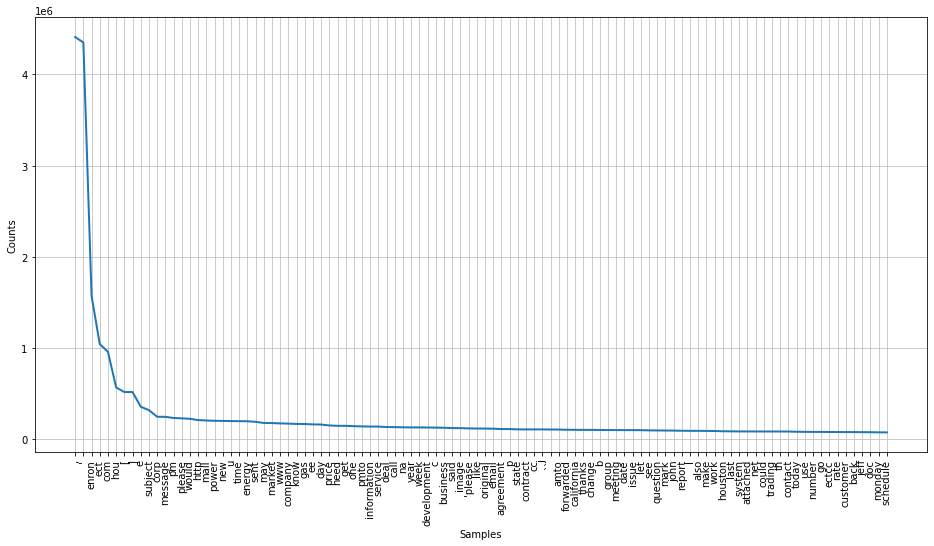

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [62]:
plt.figure(figsize =(16,8))
frequency_lem.plot(100)

In [63]:
keywords = ['illegal','prohibit','undisclosed','fault','suspend','law','debt','attorney','termination','deregulation','lack','dispute','penalty','lawsuit','fire','liquidity','testimony','bureau','nasdaq','terminated','warning','retention','lobby','terminate','quarterly','question','bankrupt','insider','crack','breaking','dead','downgrade','oversight','caught','cancelled','incorrect','unauthorized','sensitive','opposition','proxy','issuealert','secret','hide','lie','leverage','criminal','deutsche','solicitation','liable','questionable','killed','offense','suspension','facsimile','false','terrorist','burden','collapse','warned','danger']
filter_words = dict([(m, n) for m, n in frequency_lem.items() if m in keywords])

In [64]:
print(filter_words)

{'question': 96454, 'attorney': 14988, 'retention': 2927, 'sensitive': 2176, 'proxy': 2131, 'crack': 2491, 'lack': 5310, 'lobby': 2820, 'undisclosed': 1488, 'debt': 15499, 'lie': 2036, 'lawsuit': 4508, 'warned': 1697, 'dead': 2482, 'opposition': 2167, 'bankrupt': 2586, 'caught': 2261, 'incorrect': 2234, 'nasdaq': 4813, 'warning': 3196, 'downgrade': 2390, 'deregulation': 9774, 'breaking': 2490, 'fire': 4460, 'oversight': 2357, 'quarterly': 2814, 'liquidity': 4179, 'dispute': 5244, 'law': 31531, 'deutsche': 1922, 'terrorist': 1714, 'penalty': 4719, 'solicitation': 1879, 'insider': 2528, 'liable': 1913, 'criminal': 1963, 'false': 1725, 'termination': 9871, 'suspension': 1779, 'offense': 1791, 'hide': 2078, 'bureau': 3942, 'questionable': 1880, 'terminate': 2816, 'secret': 2077, 'fault': 1485, 'terminated': 3445, 'burden': 1709, 'cancelled': 2235, 'danger': 876, 'killed': 1869, 'collapse': 1701, 'prohibit': 680, 'suspend': 1602, 'leverage': 2046, 'unauthorized': 1303, 'illegal': 990, 'test

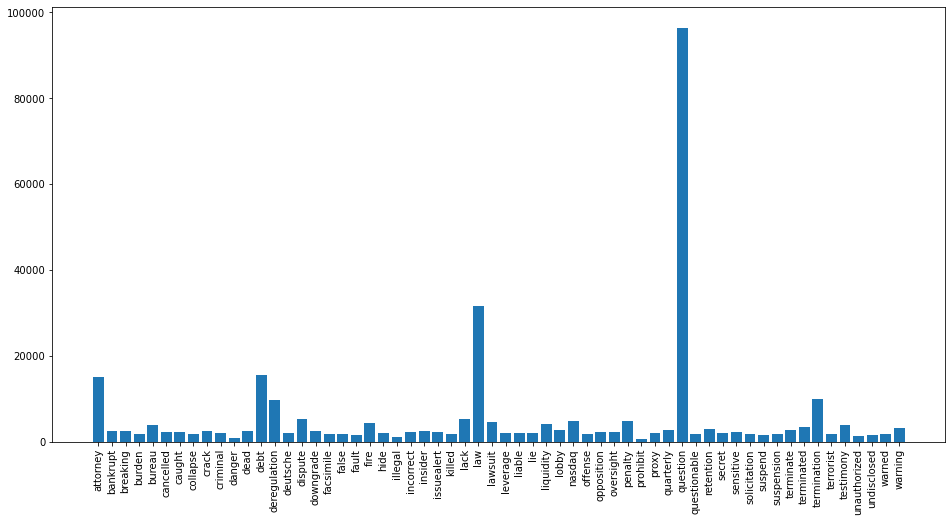

In [134]:
plt.figure(figsize =(16,8))
lists = sorted(filter_words.items())
x,y = zip(*lists)
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()


In [1]:
#save it first, before I lose it
df.to_csv('./emails_with_columns.csv')

NameError: name 'df' is not defined

Now we reset the kernel and load our new preprocessed data.

In [292]:
df = pd.read_csv('./emails_with_columns.csv')
df.head(5)

Unnamed: 0                                            message  \
0           0                              Here is our forecast    
1           1  Traveling to have a business meeting takes the...   
2           2                     test successful.  way to go!!!   
3           3  Randy, Can you send me a schedule of the salar...   
4           4                Let's shoot for Tuesday at 11:45.     

                      From                       To    Subject  \
0  phillip.allen@enron.com     tim.belden@enron.com        NaN   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test   
3  phillip.allen@enron.com    randall.gay@enron.com        NaN   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello   

                                    Date    folder  
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  sentmail  
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  sentmail  
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  sentmail  
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  sentmail  
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  sentmail

In [293]:
#here is the first 5 datapoints that have no missing value (like, all fields are filled)
#Note that if you do cc or bcc, it will not be shown on "To" email list.
df[~df.isna().any(axis=1)].head(5)

Unnamed: 0                                            message  \
1           1  Traveling to have a business meeting takes the...   
2           2                     test successful.  way to go!!!   
4           4                Let's shoot for Tuesday at 11:45.     
5           5  Greg, How about either next Tuesday or Thursda...   
7           7                   any morning between 10 and 11:30   

                      From                        To  \
1  phillip.allen@enron.com   john.lavorato@enron.com   
2  phillip.allen@enron.com    leah.arsdall@enron.com   
4  phillip.allen@enron.com      greg.piper@enron.com   
5  phillip.allen@enron.com      greg.piper@enron.com   
7  phillip.allen@enron.com  joyce.teixeira@enron.com   

                        Subject                                   Date  \
1                           Re:   Fri, 4 May 2001 13:51:00 -0700 (PDT)   
2                      Re: test  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)   
4                     Re: Hello  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)   
5                     Re: Hello  Thu, 31 Aug 2000 04:17:00 -0700 (PDT)   
7  Re: PRC review - phone calls  Fri, 14 Jul 2000 06:59:00 -0700 (PDT)   

     folder  
1  sentmail  
2  sentmail  
4  sentmail  
5  sentmail  
7  sentmail

In [294]:
df = df[:10000]

Assume that we do not need to create a node or connection where they have cc-ed or bcc-ed, also note that email is separated with comma. Now "To" field is a list of string, not just string anymore

In [295]:
df['To'].dtypes #it is now object

dtype('O')

In [296]:
#find the maximum number of recipients to see if we can do an allowcation to the field or not (like [rep1,rep2,rep3])
df.To.str.count(',').nlargest(10)

5113    794.0
5195    794.0
5234    794.0
5272    794.0
1417    348.0
5587    348.0
8104    348.0
8310    348.0
6133    242.0
6137    242.0
Name: To, dtype: float64

In [297]:
df['To']

0             tim.belden@enron.com
1          john.lavorato@enron.com
2           leah.arsdall@enron.com
3            randall.gay@enron.com
4             greg.piper@enron.com
                   ...            
9995       brian_hoskins@enron.com
9996    danielles@jonesgranger.com
9997      david.baumbach@enron.com
9998    lwbthemarine@bigplanet.com
9999    danielles@jonesgranger.com
Name: To, Length: 10000, dtype: object

In [298]:
df['To'] = df.To.astype(str).apply(lambda x: x.replace('\n\t','').replace(' ','').split(','))

In [300]:
#apparently, we can't do that. Also we should remove \n\t and consider this as a list. 
df.iloc[9999]['To'][0:20]

['danielles@jonesgranger.com']

In [301]:
sub_df = df[:500]

In [202]:
g = nx.Graph()
g.name = "Email communication"

In [203]:
for i in sub_df["From"]:
    g.add_node(i)
    for j in sub_df["To"]:
        weight =0
        for k in j:
                weight = weight + 1
                g.add_edge(i,k, weight = weight)
                

In [204]:
g.number_of_nodes()

178

In [205]:
g.number_of_edges()

354

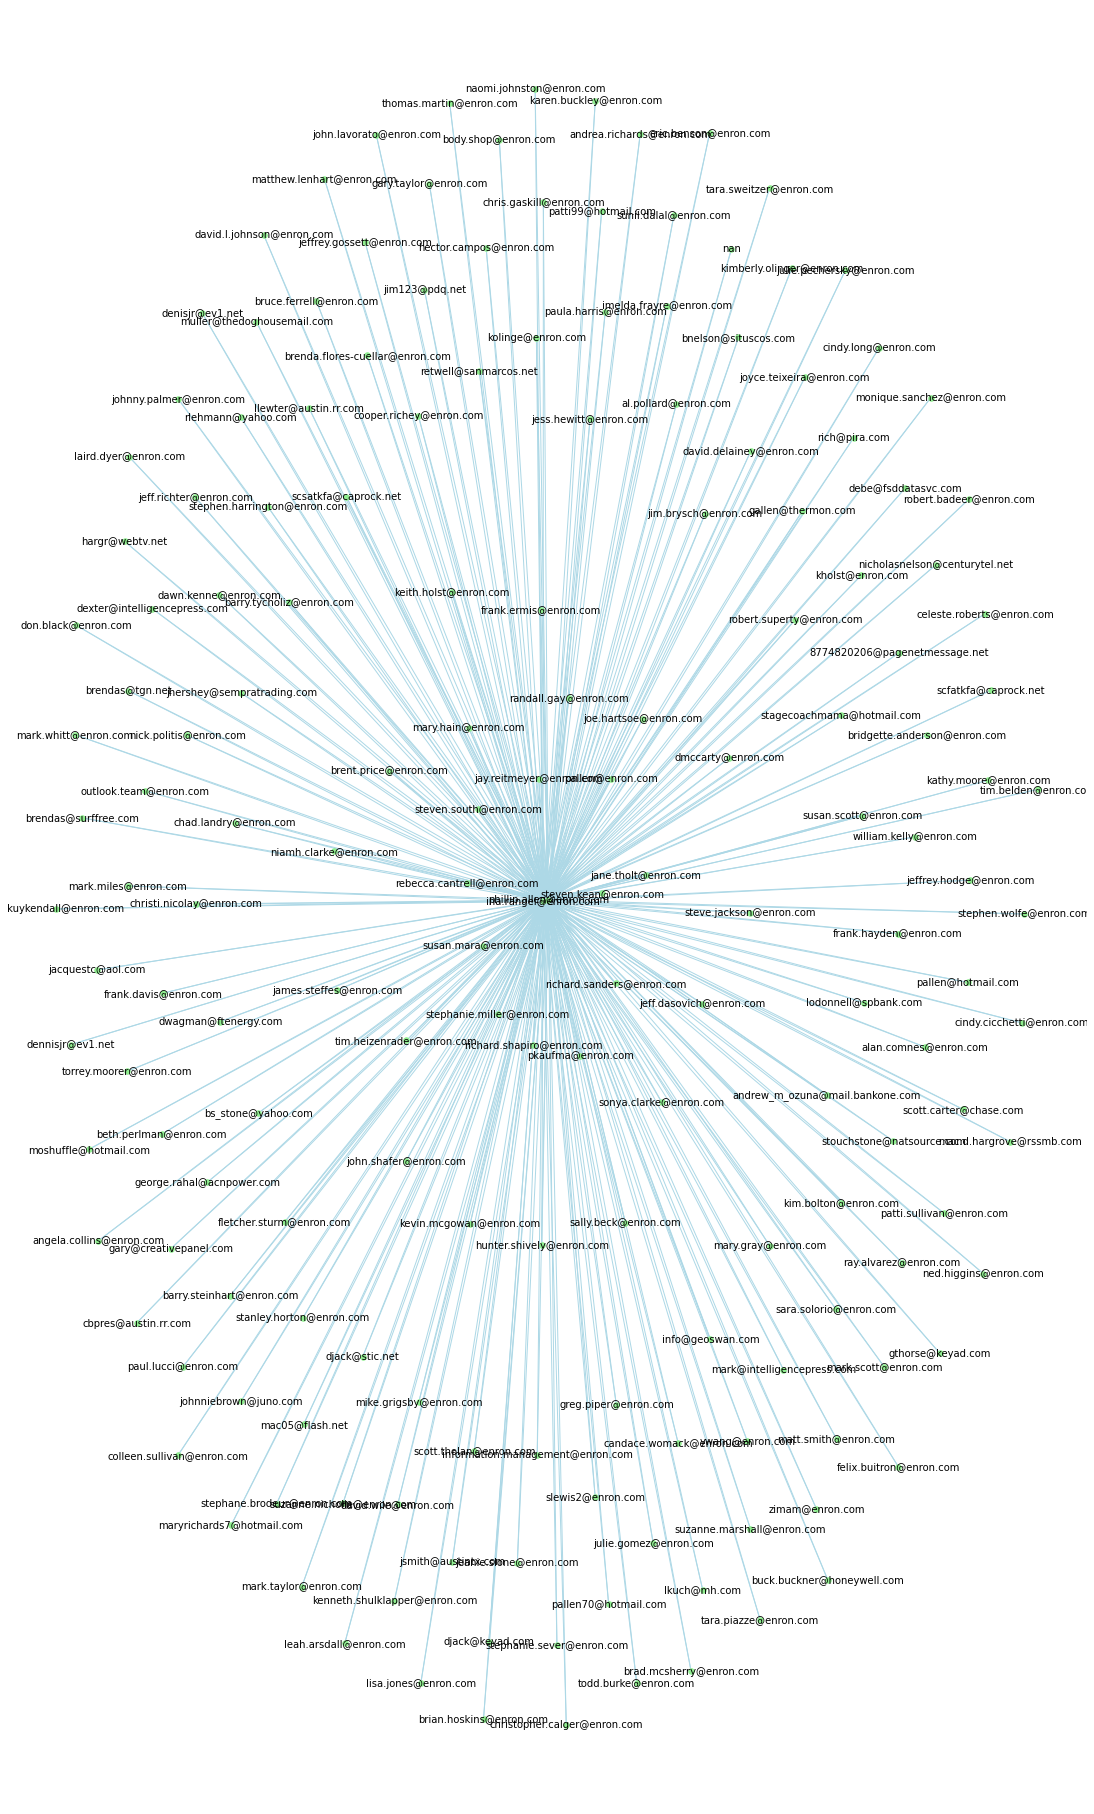

In [206]:
plt.figure(3, figsize = (15,25))
nx.draw(g, with_labels = True, node_size = 30, font_size=10, node_color = 'lightgreen', edge_color = "lightblue")


In [207]:
#measures the extent to which one node is connected to others
nx.degree_centrality(g)

{'phillip.allen@enron.com': 1.0,
 'tim.belden@enron.com': 0.011299435028248588,
 'john.lavorato@enron.com': 0.011299435028248588,
 'leah.arsdall@enron.com': 0.011299435028248588,
 'randall.gay@enron.com': 0.011299435028248588,
 'greg.piper@enron.com': 0.011299435028248588,
 'david.l.johnson@enron.com': 0.011299435028248588,
 'john.shafer@enron.com': 0.011299435028248588,
 'joyce.teixeira@enron.com': 0.011299435028248588,
 'mark.scott@enron.com': 0.011299435028248588,
 'zimam@enron.com': 0.011299435028248588,
 'buck.buckner@honeywell.com': 0.011299435028248588,
 'stagecoachmama@hotmail.com': 0.011299435028248588,
 'keith.holst@enron.com': 0.011299435028248588,
 'david.delainey@enron.com': 0.011299435028248588,
 'paula.harris@enron.com': 0.011299435028248588,
 'ina.rangel@enron.com': 1.0112994350282485,
 'tim.heizenrader@enron.com': 0.011299435028248588,
 'pallen70@hotmail.com': 0.011299435028248588,
 'bs_stone@yahoo.com': 0.011299435028248588,
 'stouchstone@natsource.com': 0.01129943502

In [209]:
central = nx.degree_centrality(g)

#separate the key value pairs to individual columns
name = []
centrality = []

for key, value in central.items():
    name.append(key)
    centrality.append(value)

central = pd.DataFrame()    
central['name'] = name
central['centrality'] = centrality
central = central.sort_values(by='centrality', ascending=False)


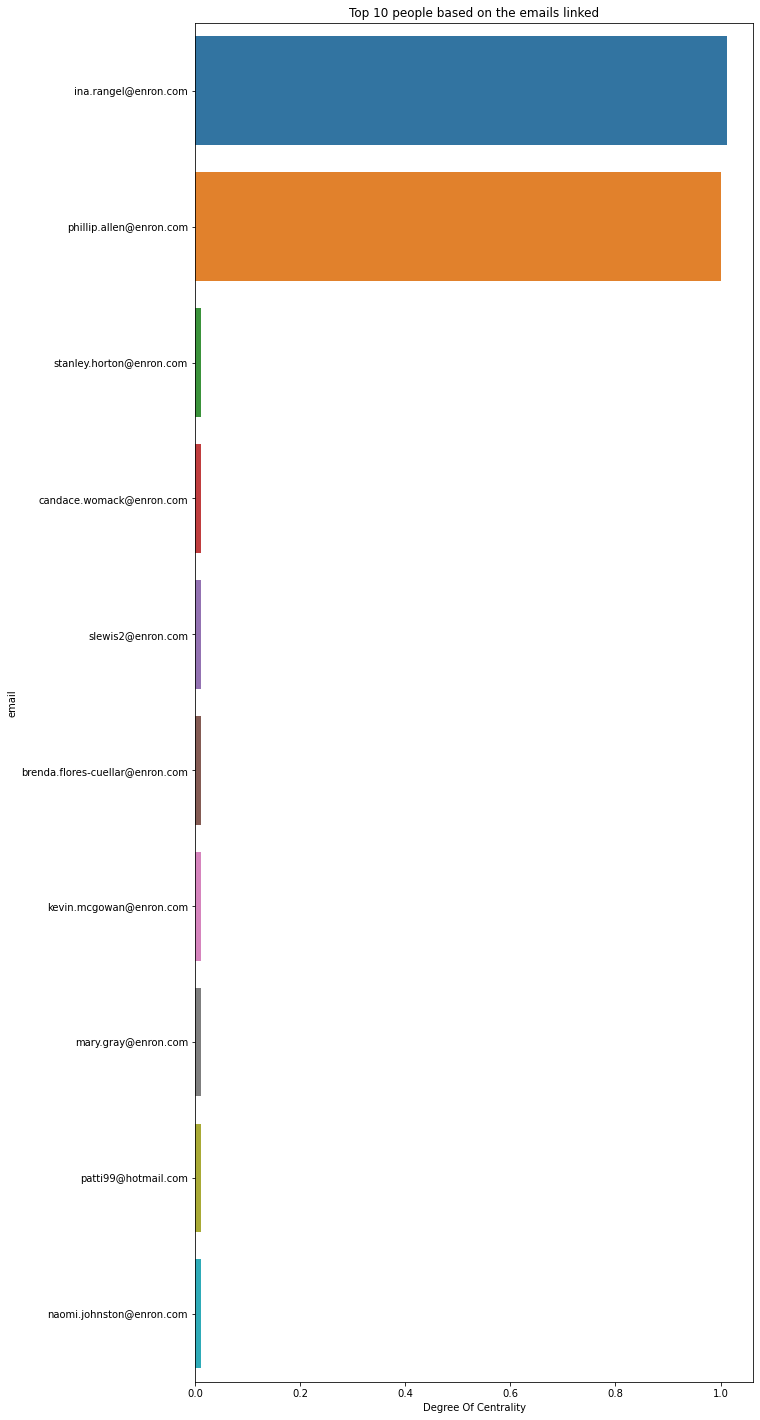

In [210]:
plt.figure(figsize=(10, 25))
sns.barplot(x='centrality', y='name', data=central[:10], orient='h')
plt.xlabel('Degree Of Centrality') 
plt.ylabel('email')
plt.title('Top 10 people based on the emails linked')
plt.show()

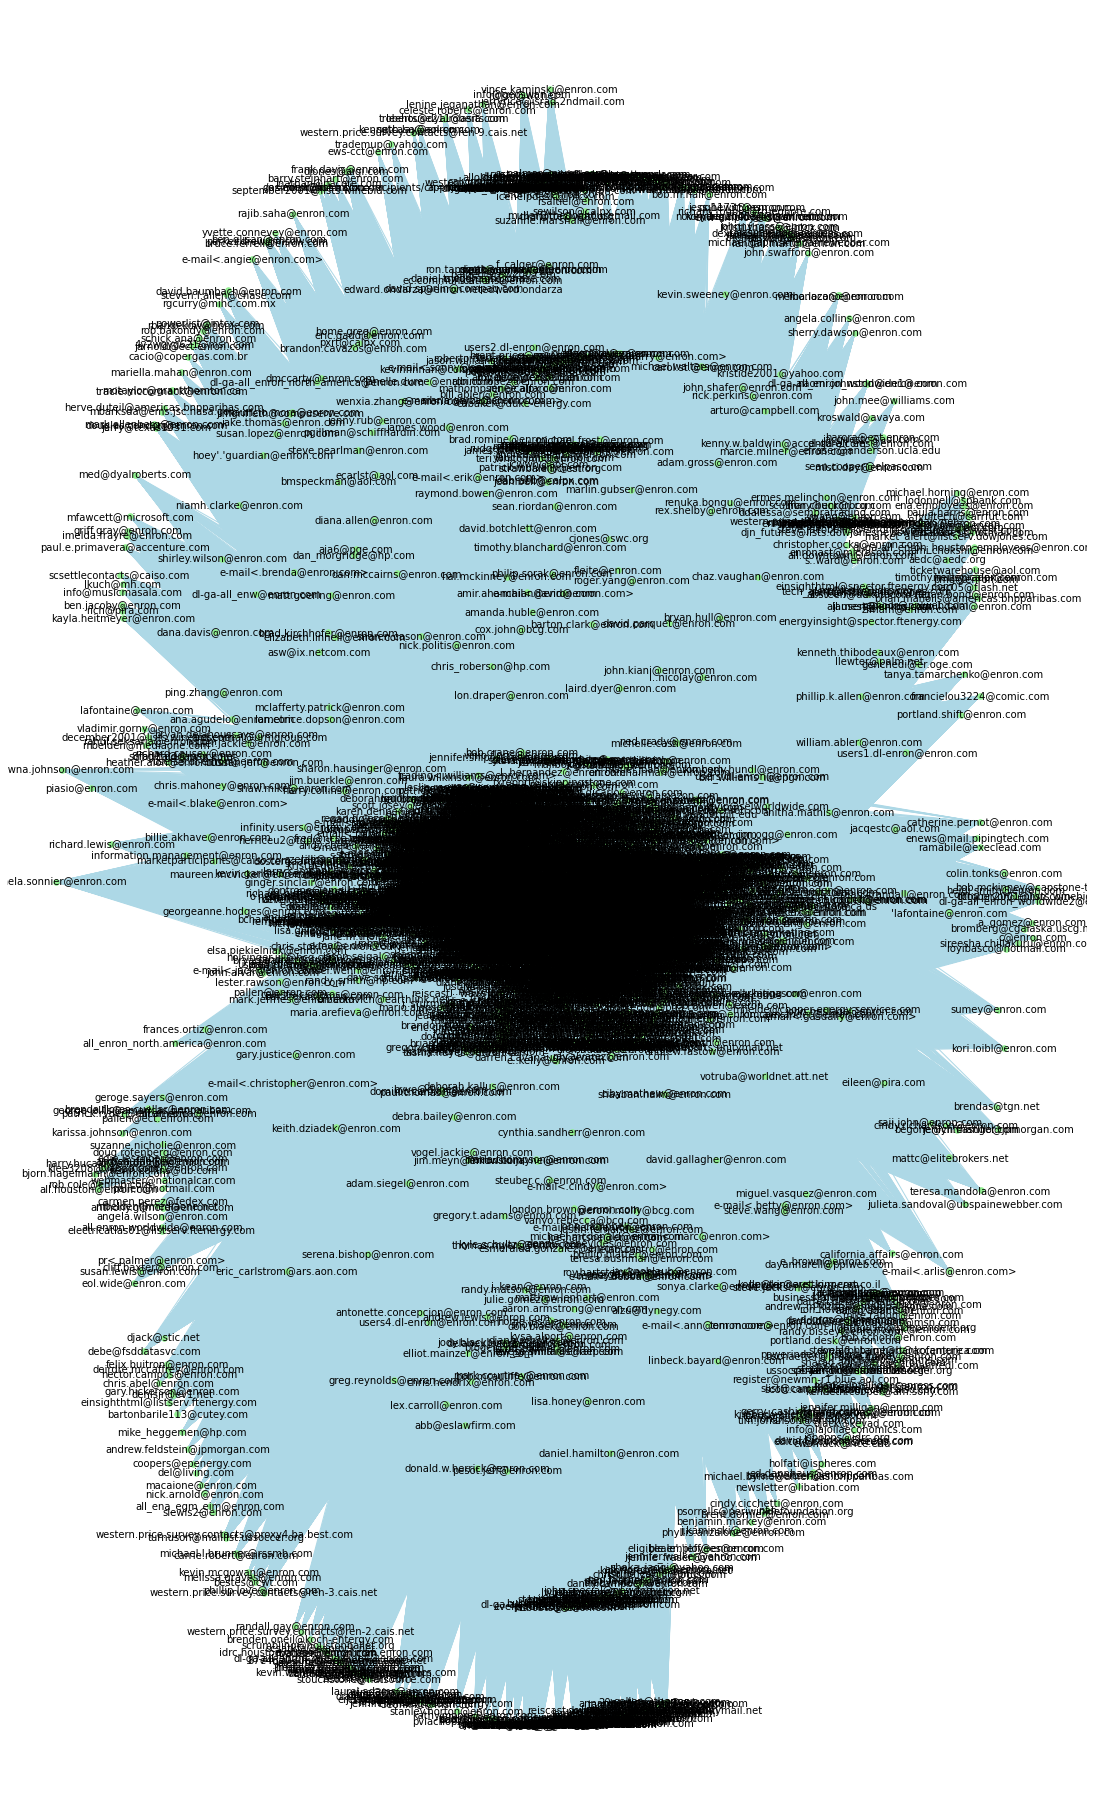

In [211]:
#same graph will look like this when we plot them for 10000 emails
f = nx.Graph()
f.name = "Email communication"

for i in df["From"]:
    f.add_node(i)
    for j in df["To"]:
        weight =0
        for k in j:
                weight = weight + 1
                f.add_edge(i,k, weight = weight)
                
plt.figure(3, figsize = (15,25))
nx.draw(f, with_labels = True, node_size = 30, font_size=10, node_color = 'lightgreen', edge_color = "lightblue")


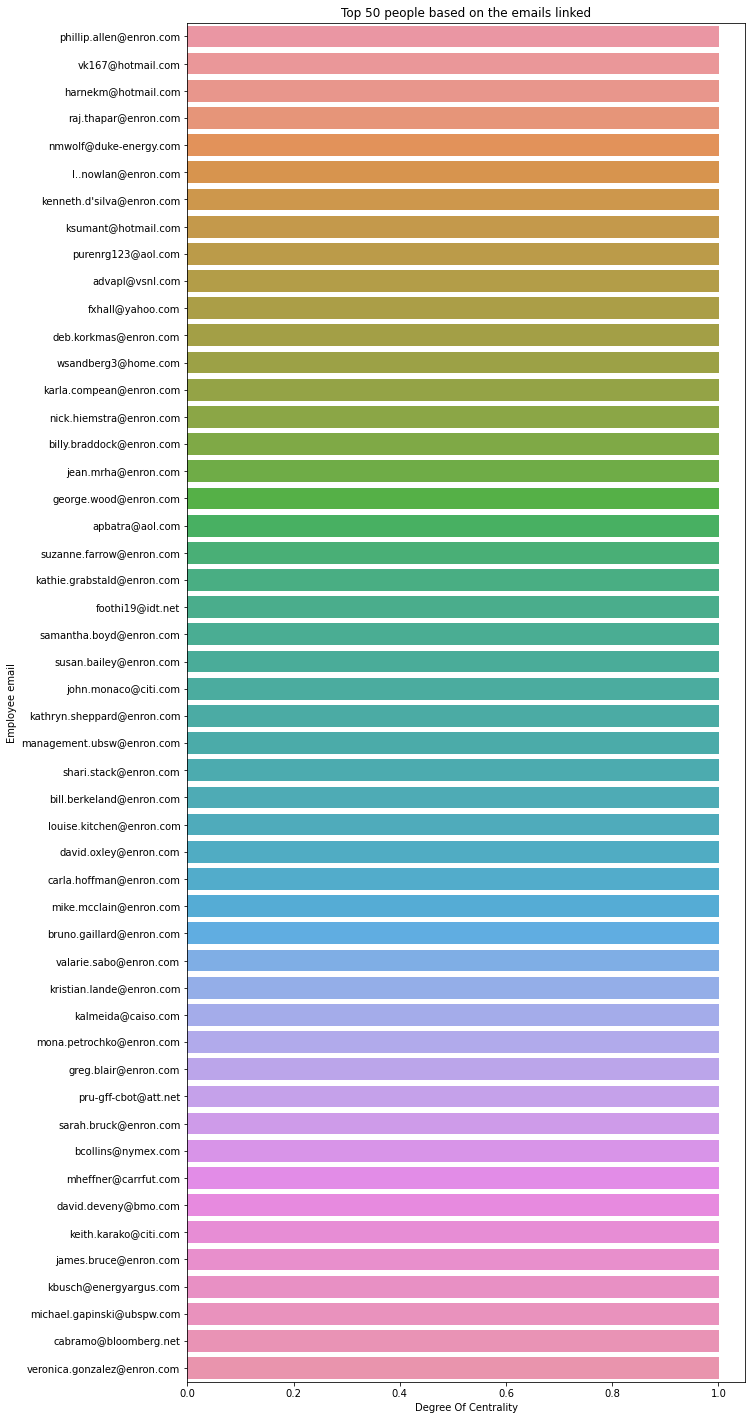

In [212]:
central = nx.degree_centrality(f)

#separate the key value pairs to individual columns
name = []
centrality = []

for key, value in central.items():
    name.append(key)
    centrality.append(value)

central = pd.DataFrame()    
central['name'] = name
central['centrality'] = centrality
central = central.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(10, 25))
sns.barplot(x='centrality', y='name', data=central[:50])
plt.xlabel('Degree Of Centrality') 
plt.ylabel('Employee email')
plt.title('Top 50 people based on the emails linked')
plt.show()


In [305]:
df.iloc[9999]['message']

"Yea, thanks for reminding me about your b-day, I nearly forgot (ha ha ha)! I don't know if I should come to the big birthday bash b/c it is in a shady area.What do you think?-eDanielle Samson <DanielleS@JonesGranger.com> on 01/24/2000 10:11:38 AMTo: Eric Bass/HOU/ECT@ECTcc:  Subject: Did you get the e-vite?"

In [303]:
df["message"].dtype

dtype('O')

In [304]:
for i in df['message']:
    part = i.partition('-e')
    i = part[0]

In [270]:
for i in m

dtype('O')

In [226]:
df.iloc[9999]['message']

"Yea, thanks for reminding me about your b-day, I nearly forgot (ha ha ha)! \n\nI don't know if I should come to the big birthday bash b/c it is in a shady \narea.\n\nWhat do you think?\n\n-e\n\n\n\n\nDanielle Samson <DanielleS@JonesGranger.com> on 01/24/2000 10:11:38 AM\n\n\n\n\n\n\nDid you get the e-vite?\n\n"

In [110]:
#one to one graph
df_buf = df[df.To.apply(lambda x: len(x) == 1)]
df_buf['To'] = df.To.apply(lambda x: str(x[0]))
G = nx.from_pandas_edgelist(df_buf, 'From', 'To')

<ipython-input-110-3a162fe62d22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buf['To'] = df.To.apply(lambda x: str(x[0]))


In [111]:
df_buf = df_buf.drop(['index'],axis=1)

KeyError: "['index'] not found in axis"

In [112]:
df_buf = df_buf.reset_index()

In [113]:
df_buf = df_buf.groupby(['From'])['To'].apply(lambda x: ','.join(x.astype(str)).split(',')).reset_index()

In [114]:
#now it is iterable
email_list = df_buf['From'].to_list()

In [115]:
for x in df_buf['To']:
    for y in x:
        if y not in email_list:
            email_list.append(y)
        else:
            pass

25943

In [116]:
G.number_of_nodes()

1226

In [117]:
from matplotlib.pyplot import figure
import nxviz as nv

ModuleNotFoundError: No module named 'nxviz'

In [118]:
pip install nxviz

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\nithincb\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nithincb\\AppData\\Local\\Temp\\pip-install-f40kh7_z\\numpy\\setup.py'"'"'; __file__='"'"'C:\\Users\\nithincb\\AppData\\Local\\Temp\\pip-install-f40kh7_z\\numpy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\nithincb\AppData\Local\Temp\pip-wheel-l9jjgpc0'
       cwd: C:\Users\nithincb\AppData\Local\Temp\pip-install-f40kh7_z\numpy\
  Complete output (269 lines):
  Running from numpy source directory.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\nithincb\\Anaconda3\\lib', 'C:\\', 'C:\\Users\\nithincb\\Anaconda3\\libs

  Running setup.py clean for numpy
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1555995 sha256=d5becfc2f577bd3f1c0e85fbcd3b25847b4c32e5953727a101099bfb268666e5
  Stored in directory: c:\users\nithincb\appdata\local\pip\cache\wheels\ff\62\9e\0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
  Running setup.py clean for matplotlib
  Created wheel for PyYAML: filename=PyYAML-5.1.2-cp38-cp38-win_amd64.whl size=44104 sha256=1a2771cf37ec6bf14d8cb70de911999ec8161b1f2eacdc72c9d227cd236f6ac9
  Stored in directory: c:\users\nithincb\appdata\local\pip\cache\wheels\55\40\9f\027c3d94280ce2b7c2c107cb563a433e6572f830a5462231ae
  Created wheel for sphinxcontrib-fulltoc: filename=sphinxcontrib_fulltoc-1.2.0-py2.py3-none-any.whl size=8723 sha256=0a2c95d2226aca1af3967b5079dad8548659fb8414d6fcbedf8d22b76419f637
  Stored in directory: c:\users\nithincb\appdata\local\pip\cache\wheels\85\cf\9c\c7338d14a91c8ac5bc28d77c013ad562cc881c7dd4e59b6c94
  Running setup.py clean for pa


      Blas library.
    self.calc_info()
  blas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blas not found in ['C:\\Users\\nithincb\\Anaconda3\\lib', 'C:\\', 'C:\\Users\\nithincb\\Anaconda3\\libs']
    NOT AVAILABLE
  
  C:\Users\nithincb\AppData\Local\Temp\pip-install-f40kh7_z\numpy\numpy\distutils\system_info.py:690: UserWarning:
      Blas (http://www.netlib.org/blas/) libraries not found.
      Directories to search for the libraries can be specified in the
      numpy/distutils/site.cfg file (section [blas]) or by setting
      the BLAS environment variable.
    self.calc_info()
  blas_src_info:
    NOT AVAILABLE
  
  C:\Users\nithincb\AppData\Local\Temp\pip-install-f40kh7_z\numpy\numpy\distutils\system_info.py:690: UserWarning:
      Blas (http://www.netlib.org/blas/) sources not found.
      Directories to search for the sources can be specified in the
      numpy/distutils/site.cfg fil

  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\cryptography
  copying src\cryptography\exceptions.py -> build\lib.win-amd64-3.8\cryptography
  copying src\cryptography\fernet.py -> build\lib.win-amd64-3.8\cryptography
  copying src\cryptography\utils.py -> build\lib.win-amd64-3.8\cryptography
  copying src\cryptography\__about__.py -> build\lib.win-amd64-3.8\cryptography
  copying src\cryptography\__init__.py -> build\lib.win-amd64-3.8\cryptography
  creating build\lib.win-amd64-3.8\cryptography\hazmat
  copying src\cryptography\hazmat\_oid.py -> build\lib.win-amd64-3.8\cryptography\hazmat
  copying src\cryptography\hazmat\__init__.py -> build\lib.win-amd64-3.8\cryptography\hazmat
  creating build\lib.win-amd64-3.8\cryptography\x509
  copying src\cryptography\x509\base.py -> build\lib.win-amd64-3.8\cryptography\x509
  copying src\cryptography\x509\certificate_transparency.py -> build\lib.win-amd64-3.8\cryptography\x509
  copying src\cryptography\

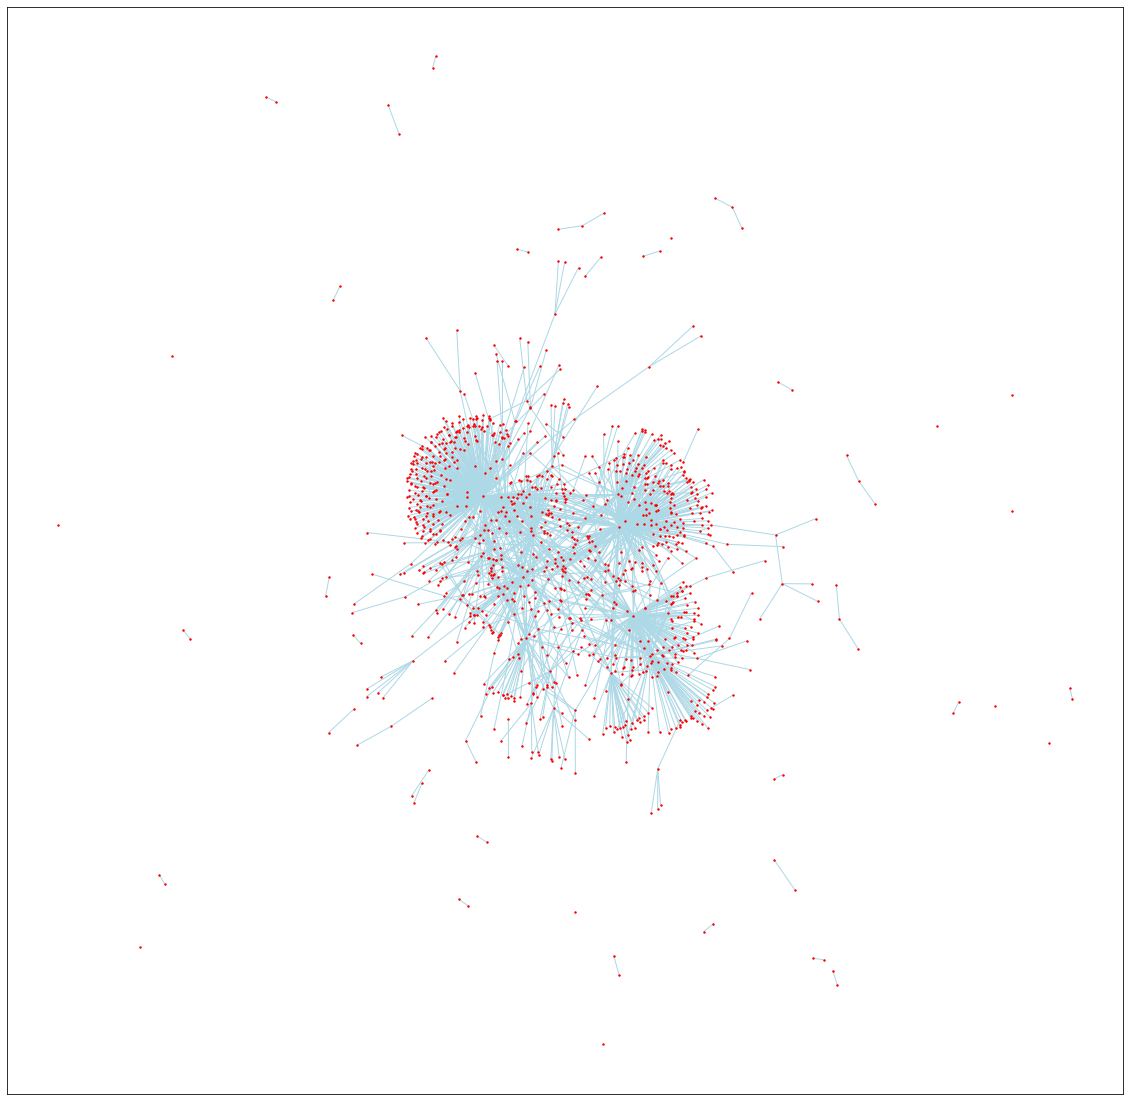

In [121]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k = 0.02, iterations = 10)
nx.draw_networkx(G, pos, node_size=2, node_color='red', with_labels=False, edge_color='lightblue',width = 1)
plt.show()
#the problem with this graph is that [email_a, email_b] and [email_a] does not add up the frequency for email_a (more like those are independent but in fact dependent)

In [122]:
from collections import Counter

In [123]:
df_buf

From  \
0               'todd'.delahoussaye@enron.com   
1    1.10969419.-18@multexinvestornetwork.com   
2     1.10969419.-2@multexinvestornetwork.com   
3     1.10969419.-3@multexinvestornetwork.com   
4     1.11913372.-2@multexinvestornetwork.com   
..                                        ...   
631                          wtashnek@aol.com   
632              yahoo-delivers@yahoo-inc.com   
633                  yevgeny.frolov@enron.com   
634                  yild@zdemail.zdlists.com   
635                zachary.streight@enron.com   

                                                    To  
0                             [susan.bailey@enron.com]  
1       [harry.arora@enron.com, harry.arora@enron.com]  
2    [harry.arora@enron.com, harry.arora@enron.com,...  
3       [harry.arora@enron.com, harry.arora@enron.com]  
4    [pallen@enron.com, pallen@enron.com, pallen@en...  
..                                                 ...  
631                            [john.arnold@enron.com]  
632  [pallen@ect.enron.com, pallen@ect.enron.com, p...  
633                               [k..allen@enron.com]  
634  [pallen@enron.com, pallen@enron.com, pallen@en...  
635                             [john.spitz@enron.com]  

[636 rows x 2 columns]

In [124]:
def checkEmailIndex(array):
    y = []
    for x in array:
        y.append(email_list.index(x))
    return y

In [125]:
df_buf['Connection'] = df_buf.To.apply(lambda x: Counter(x))

In [126]:
df_buf['To_id'] = df_buf.To.apply(lambda x: checkEmailIndex(x))

In [127]:
df_buf['Connection_id'] = df_buf.To_id.apply(lambda x: Counter(x))
df_buf

From  \
0               'todd'.delahoussaye@enron.com   
1    1.10969419.-18@multexinvestornetwork.com   
2     1.10969419.-2@multexinvestornetwork.com   
3     1.10969419.-3@multexinvestornetwork.com   
4     1.11913372.-2@multexinvestornetwork.com   
..                                        ...   
631                          wtashnek@aol.com   
632              yahoo-delivers@yahoo-inc.com   
633                  yevgeny.frolov@enron.com   
634                  yild@zdemail.zdlists.com   
635                zachary.streight@enron.com   

                                                    To  \
0                             [susan.bailey@enron.com]   
1       [harry.arora@enron.com, harry.arora@enron.com]   
2    [harry.arora@enron.com, harry.arora@enron.com,...   
3       [harry.arora@enron.com, harry.arora@enron.com]   
4    [pallen@enron.com, pallen@enron.com, pallen@en...   
..                                                 ...   
631                            [john.arnold@enron.com]   
632  [pallen@ect.enron.com, pallen@ect.enron.com, p...   
633                               [k..allen@enron.com]   
634  [pallen@enron.com, pallen@enron.com, pallen@en...   
635                             [john.spitz@enron.com]   

                                            Connection  \
0                        {'susan.bailey@enron.com': 1}   
1                         {'harry.arora@enron.com': 2}   
2                        {'harry.arora@enron.com': 11}   
3                         {'harry.arora@enron.com': 2}   
4                              {'pallen@enron.com': 3}   
..                                                 ...   
631                       {'john.arnold@enron.com': 1}   
632  {'pallen@ect.enron.com': 5, 'jarnold@ect.enron...   
633                          {'k..allen@enron.com': 1}   
634                            {'pallen@enron.com': 3}   
635                        {'john.spitz@enron.com': 1}   

                                                 To_id     Connection_id  
0                                                [576]          {576: 1}  
1                                           [250, 250]          {250: 2}  
2    [250, 250, 250, 250, 250, 250, 250, 250, 250, ...         {250: 11}  
3                                           [250, 250]          {250: 2}  
4                                      [636, 636, 636]          {636: 3}  
..                                                 ...               ...  
631                                              [308]          {308: 1}  
632           [649, 649, 649, 649, 649, 665, 665, 665]  {649: 5, 665: 3}  
633                                              [328]          {328: 1}  
634                                    [636, 636, 636]          {636: 3}  
635                                             [1225]         {1225: 1}  

[636 rows x 5 columns]

In [128]:
i = 0
for x in df_buf.Connection_id:
    x['from'] = i
    i = i+1

In [129]:
df_buf_2 = df_buf['Connection_id']
df_buf_2

0                {576: 1, 'from': 0}
1                {250: 2, 'from': 1}
2               {250: 11, 'from': 2}
3                {250: 2, 'from': 3}
4                {636: 3, 'from': 4}
                   ...              
631            {308: 1, 'from': 631}
632    {649: 5, 665: 3, 'from': 632}
633            {328: 1, 'from': 633}
634            {636: 3, 'from': 634}
635           {1225: 1, 'from': 635}
Name: Connection_id, Length: 636, dtype: object

In [130]:
len_email_list= len(email_list)
C = np.zeros((25943,25943), dtype=int)

# Data Exploration: Exploring the Email Dataset

**plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

In [131]:
#create adjacency matrix
#please note that this is one-to-one relationship graph, that is the graph of relationship on the email that has one sender and one recipient (because of calculation complexity and just because the memory allocation problem itself)
for x in df_buf_2:
    for y in x.items():
        if y[0] != 'from':
            C[x['from']][y[0]] = C[x['from']][y[0]] + y[1]
            C[y[0]][x['from']] = C[y[0]][x['from']] + y[1]
        else:
            pass

In [132]:
#define the graph
Gp = nx.from_numpy_matrix(C)

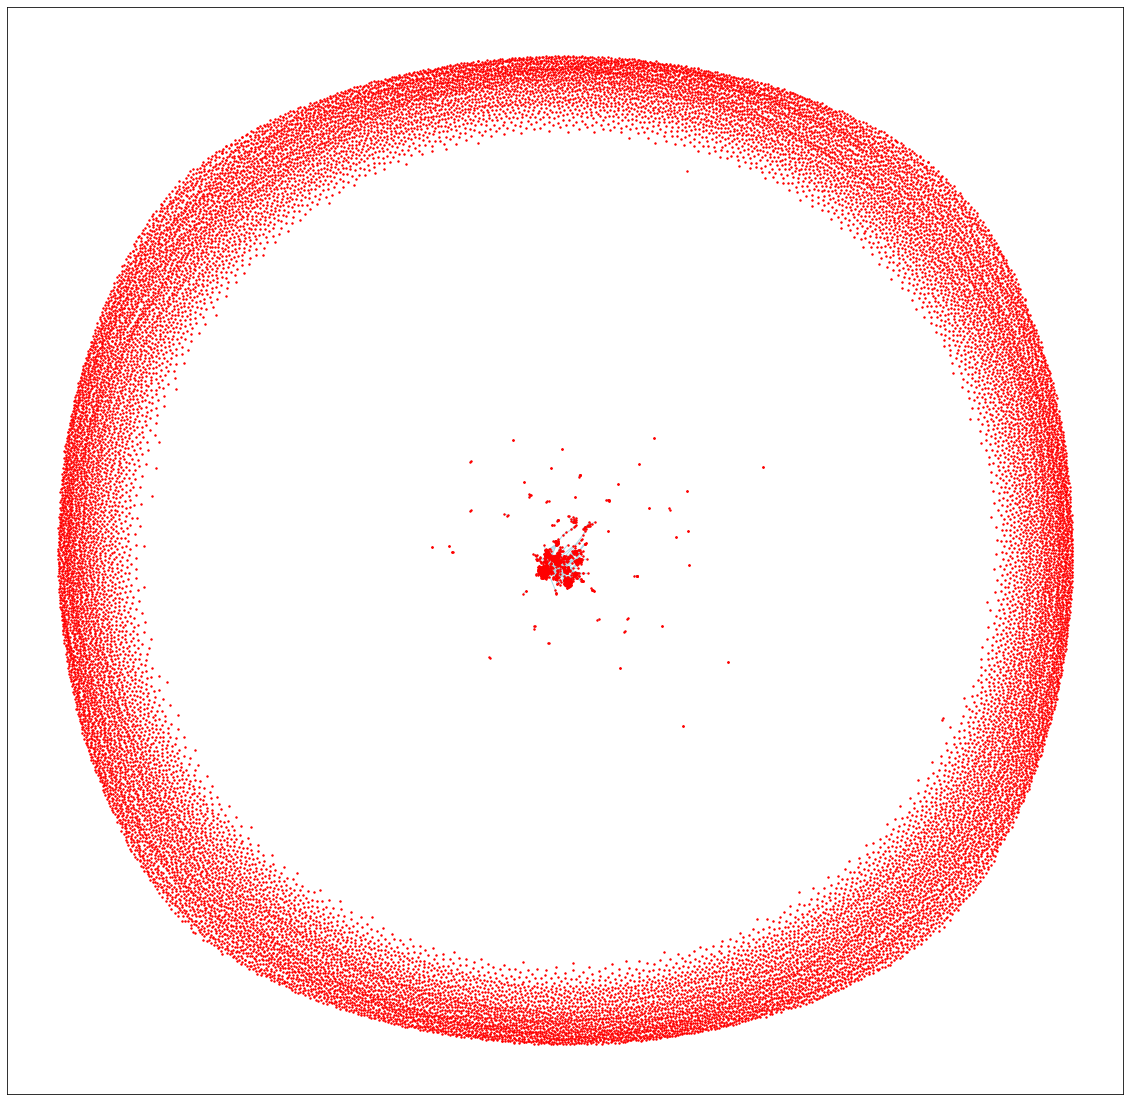

In [133]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gp) #k = 1/sqrt(25943) = 0.006, iterations = 50
nx.draw_networkx(Gp, pos, node_size=2, node_color='red', with_labels=False, edge_color='lightblue',width = 1)
plt.show()

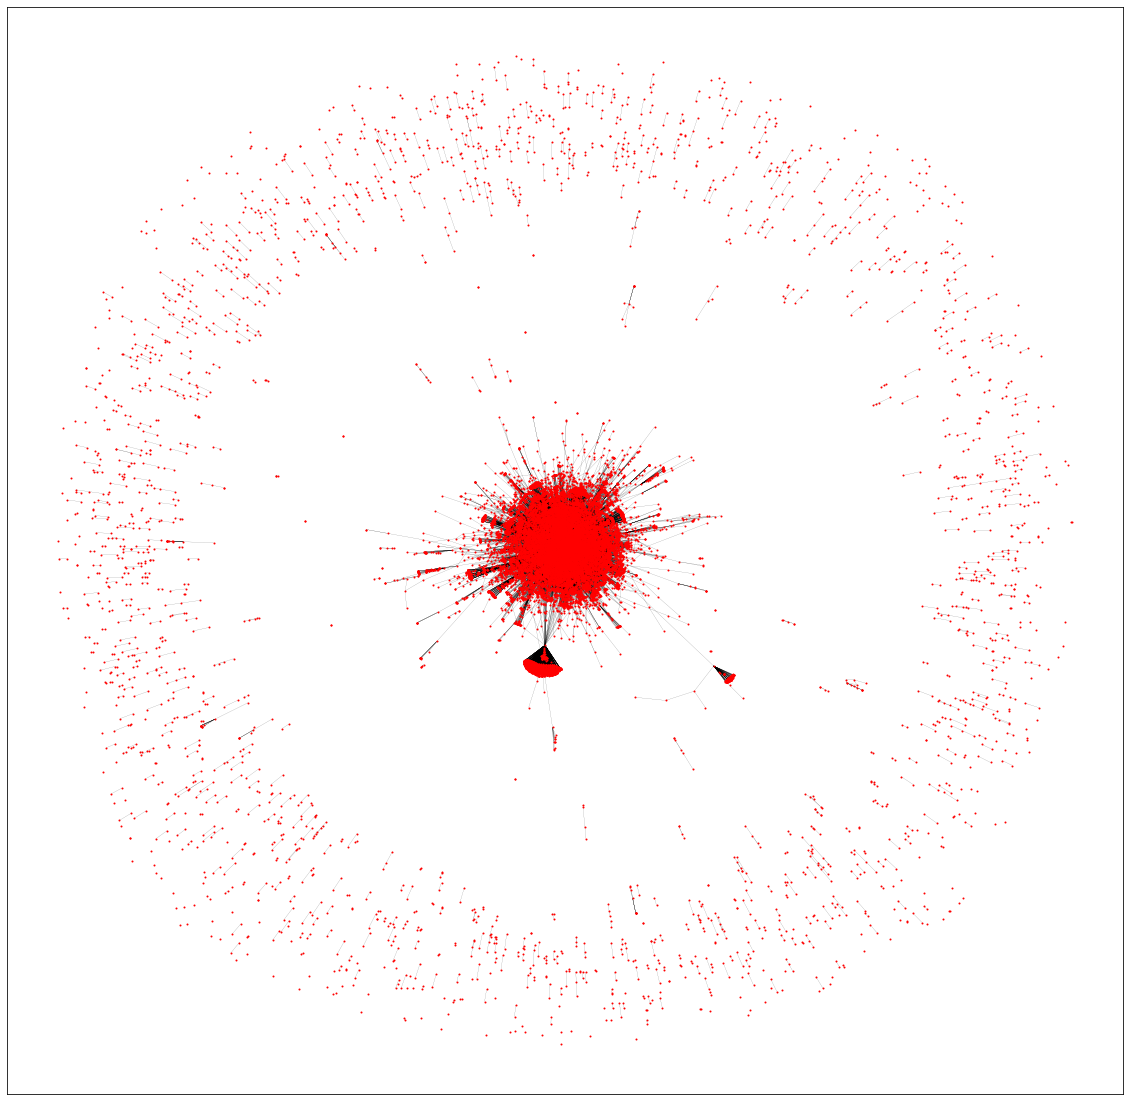

In [199]:
#took ~20 minutes to run
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gp, k = 0.01)
nx.draw_networkx(Gp, pos, node_size=1, node_color='red', with_labels=False, edge_color='black',width = 0.1)
plt.show()

In [134]:
#one to two relationship
df_buf = df[df.To.apply(lambda x: len(x) == 2)]

In [135]:
df_buf = df_buf.drop(['Unnamed: 0','file','message','Subject','Date'], axis=1)

KeyError: "['file'] not found in axis"

In [206]:
df_buf = df_buf.drop(['index'],axis = 1)
df_buf

From  \
0      phillip.allen@enron.com   
1      phillip.allen@enron.com   
2      phillip.allen@enron.com   
3      phillip.allen@enron.com   
4      phillip.allen@enron.com   
...                        ...   
37246  john.zufferli@enron.com   
37247  john.zufferli@enron.com   
37248  john.zufferli@enron.com   
37249  john.zufferli@enron.com   
37250  john.zufferli@enron.com   

                                                      To  
0      [david.l.johnson@enron.com, john.shafer@enron....  
1      [paul.lucci@enron.com, kenneth.shulklapper@enr...  
2        [mike.grigsby@enron.com, frank.ermis@enron.com]  
3      [fletcher.sturm@enron.com, hunter.shively@enro...  
4      [matthew.lenhart@enron.com, mike.grigsby@enron...  
...                                                  ...  
37246  [cooper.richey@enron.com, bill.greenizan@enron...  
37247  [derek.davies@enron.com, rob.milnthorp@enron.com]  
37248  [kimberly.hillis@enron.com, john.lavorato@enro...  
37249  [cooper.richey@enron.com, bill.greenizan@enron...  
37250  [cooper.richey@enron.com, bill.greenizan@enron...  

[37251 rows x 2 columns]

In [ ]:
x = ['a','b']
str(x).replace('[','').replace(']','').replace("'",'').split(',')

In [ ]:
email_list = df_buf['From'].to_list()
for x in df_buf['To']:
    for y in x:
        if y not in email_list:
            email_list.append(y)
        else:
            pass

In [ ]:
len(email_list)

In [ ]:
C = np.zeros((14943,14943), dtype = np.short)

In [ ]:
#df_buf['To'] = df.To.apply(lambda x: str(x).replace('[','').replace(']','').replace("'",''))
#df_buf = df_buf.groupby(['From'])['To'].apply(lambda x: ','.join(x.astype(str)).split(',')).reset_index()
df_buf.head(3)

In [232]:
df_buf['To_id'] = df_buf.To.apply(lambda x: checkEmailIndex(x))
df_buf['Connection_id'] = df_buf.To_id.apply(lambda x: Counter(x))
i = 0
for x in df_buf.Connection_id:
    x['from'] = i
    i = i+1
df_buf_2 = df_buf['Connection_id']
for x in df_buf_2:
    for y in x.items():
        if y[0] != 'from':
            C[x['from']][y[0]] = C[x['from']][y[0]] + y[1]
            C[y[0]][x['from']] = C[y[0]][x['from']] + y[1]
        else:
            pass

In [ ]:
Gp = nx.from_numpy_matrix(C)

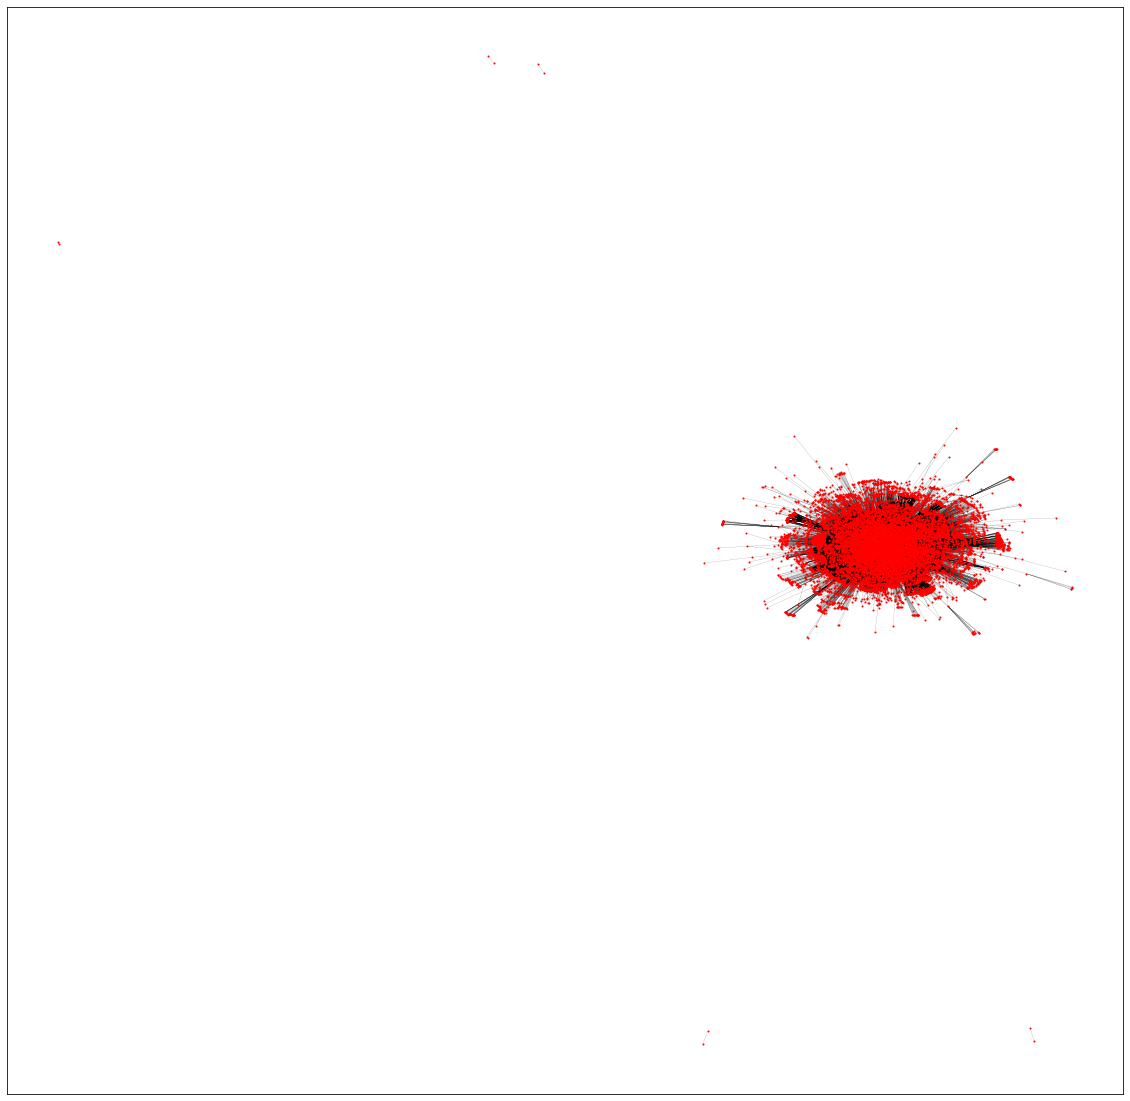

In [233]:
#graph for one to two (I suppose)
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gp, k = 0.01)
nx.draw_networkx(Gp, pos, node_size=1, node_color='red', with_labels=False, edge_color='black',width = 0.1)
plt.show()

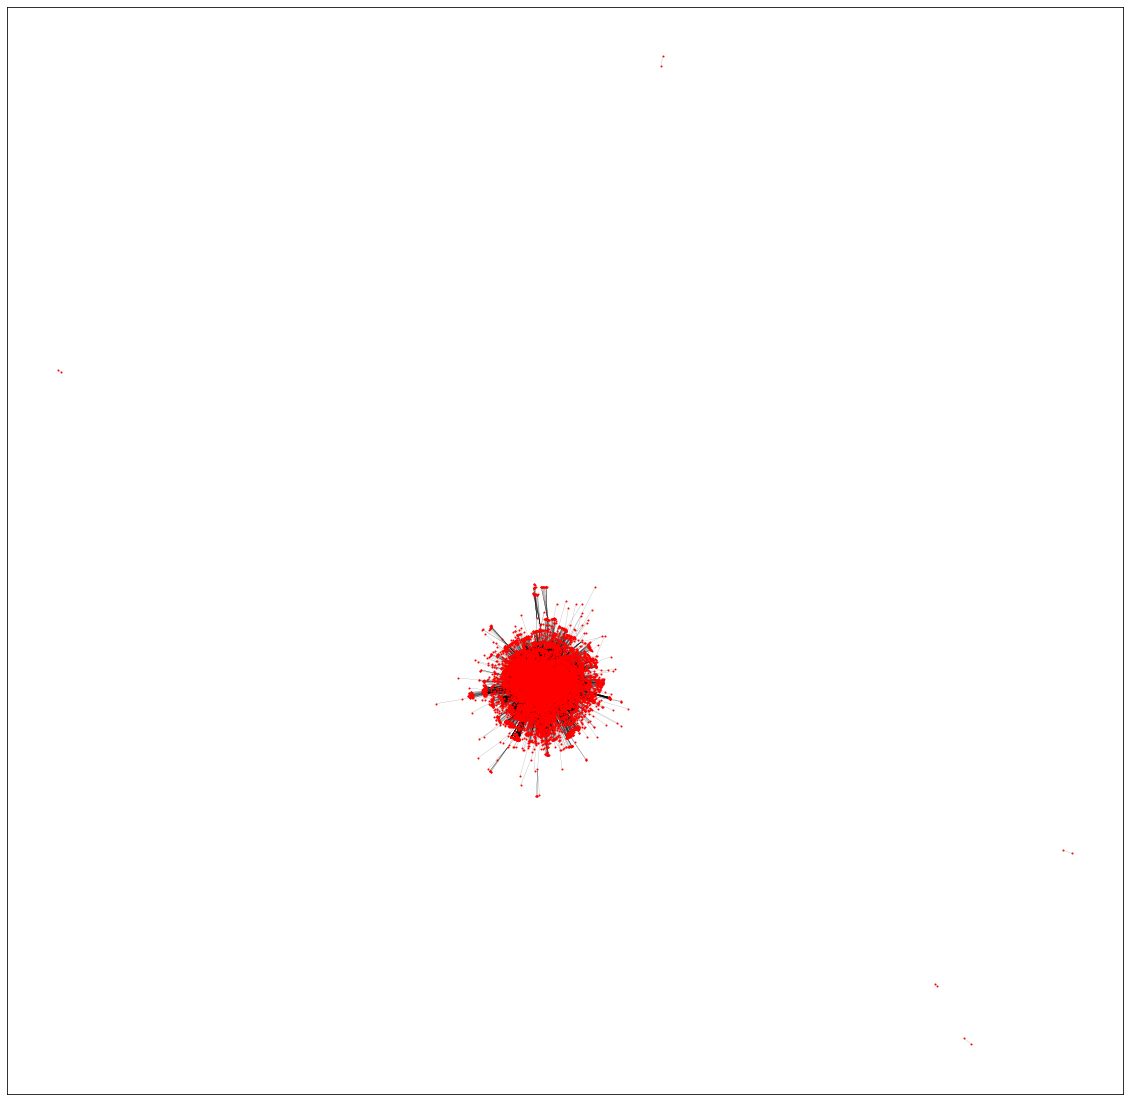

In [240]:
#small explosion. I hate it.
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gp)
nx.draw_networkx(Gp, pos, node_size=1, node_color='red', with_labels=False, edge_color='black',width = 0.1)
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

we want to see that at what time is the most common emailing time and what time is the least common emailing time so that we could
    1) can find the best time for maintainance the email system if needed.
    2) can find the most active time for people to send email here
    3) to approximately see what time policy do they need to adjust based on email responding time.











Write codes to implement the solution in python:

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

















In [46]:
#import library (even more)
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [237]:
df

Unnamed: 0                       file  \
0                0      allen-p/_sent_mail/1.   
1                1     allen-p/_sent_mail/10.   
2                2    allen-p/_sent_mail/100.   
3                3   allen-p/_sent_mail/1000.   
4                4   allen-p/_sent_mail/1001.   
...            ...                        ...   
517396      517396  zufferli-j/sent_items/95.   
517397      517397  zufferli-j/sent_items/96.   
517398      517398  zufferli-j/sent_items/97.   
517399      517399  zufferli-j/sent_items/98.   
517400      517400  zufferli-j/sent_items/99.   

                                                  message  \
0                               Here is our forecast\n\n    
1       Traveling to have a business meeting takes the...   
2                          test successful.  way to go!!!   
3       Randy,\n\n Can you send me a schedule of the s...   
4                     Let's shoot for Tuesday at 11:45.     
...                                                   ...   
517396  This is a trade with OIL-SPEC-HEDGE-NG (John L...   
517397  Some of my position is with the Alberta Term b...   
517398  2\n\n -----Original Message-----\nFrom: \tDouc...   
517399  Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...   
517400  i think the YMCA has a class that is for peopl...   

                           From                            To  \
0       phillip.allen@enron.com        [tim.belden@enron.com]   
1       phillip.allen@enron.com     [john.lavorato@enron.com]   
2       phillip.allen@enron.com      [leah.arsdall@enron.com]   
3       phillip.allen@enron.com       [randall.gay@enron.com]   
4       phillip.allen@enron.com        [greg.piper@enron.com]   
...                         ...                           ...   
517396  john.zufferli@enron.com        [kori.loibl@enron.com]   
517397  john.zufferli@enron.com     [john.lavorato@enron.com]   
517398  john.zufferli@enron.com       [dawn.doucet@enron.com]   
517399  john.zufferli@enron.com      [jeanie.slone@enron.com]   
517400  john.zufferli@enron.com  [livia_zufferli@monitor.com]   

                          Subject                                   Date  
0                             NaN  Mon, 14 May 2001 16:39:00 -0700 (PDT)  
1                             Re:   Fri, 4 May 2001 13:51:00 -0700 (PDT)  
2                        Re: test  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  
3                             NaN  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  
4                       Re: Hello  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  
...                           ...                                    ...  
517396   Trade with John Lavorato  Wed, 28 Nov 2001 13:30:11 -0800 (PST)  
517397                 Gas Hedges  Wed, 28 Nov 2001 12:47:48 -0800 (PST)  
517398           RE: CONFIDENTIAL  Wed, 28 Nov 2001 07:20:00 -0800 (PST)  
517399  Calgary Analyst/Associate  Tue, 27 Nov 2001 11:52:45 -0800 (PST)  
517400           RE: ali's essays  Mon, 26 Nov 2001 10:48:43 -0800 (PST)  

[517401 rows x 7 columns]

In [11]:
df.Date = df.Date.apply(lambda x: x.split('-')[0])
df.Date

0         Mon, 14 May 2001 16:39:00 
1          Fri, 4 May 2001 13:51:00 
2         Wed, 18 Oct 2000 03:00:00 
3         Mon, 23 Oct 2000 06:13:00 
4         Thu, 31 Aug 2000 05:07:00 
                     ...            
517396    Wed, 28 Nov 2001 13:30:11 
517397    Wed, 28 Nov 2001 12:47:48 
517398    Wed, 28 Nov 2001 07:20:00 
517399    Tue, 27 Nov 2001 11:52:45 
517400    Mon, 26 Nov 2001 10:48:43 
Name: Date, Length: 517401, dtype: object

In [ ]:
type(df.Date[])

In [19]:
len('Mon, 14 May 2001 16:39:00 ')

26

In [32]:
df['Time'] = df.Date.apply(lambda x: x.split(' ')[4])

In [33]:
df['Time'] = pd.to_datetime(df['Time'], format = '%X')

<AxesSubplot:xlabel='Time'>

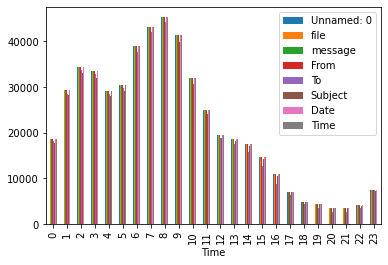

In [34]:
figure, ax1 = plt.subplots()
ax1.plot(df.iloc[:,0],df.iloc[:,1],linewidth=0.5,zorder=1, label = "Force1")

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary








*-----------------
# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 5".
        
**Note: Each team only needs to submit one submission in Canvas**


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot email communication graph/network (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

